In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | amderma
City not found. Skipping...
Processing Record 4 of Set 1 | santiago del estero
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | yatou
Processing Record 10 of Set 1 | severo-kurilsk
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | barbar
City not found. Skipping...
Processing Record 14 of Set 1 | flinders
Processing Record 15 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 16 of Set 1 | shibetsu
Processing Record 17 of Set 1 | alta floresta
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | bambous virieux
Processing Record 20 of Set 1 | upernavik
Processing Record 21 

Processing Record 34 of Set 4 | lesnyye polyany
Processing Record 35 of Set 4 | saint george
Processing Record 36 of Set 4 | touros
Processing Record 37 of Set 4 | chenghai
Processing Record 38 of Set 4 | potsdam
Processing Record 39 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 40 of Set 4 | samusu
City not found. Skipping...
Processing Record 41 of Set 4 | shubarkuduk
Processing Record 42 of Set 4 | killybegs
Processing Record 43 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 44 of Set 4 | meyungs
City not found. Skipping...
Processing Record 45 of Set 4 | salalah
Processing Record 46 of Set 4 | saskylakh
Processing Record 47 of Set 4 | ketchikan
Processing Record 48 of Set 4 | san quintin
Processing Record 49 of Set 4 | sataua
City not found. Skipping...
Processing Record 50 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 1 of Set 5 | kahului
Processing Record 2 of Set 5 | qaqortoq
Processing Record 3 of Set 5 | ixtapa
Processing 

Processing Record 21 of Set 8 | talnakh
Processing Record 22 of Set 8 | marcona
City not found. Skipping...
Processing Record 23 of Set 8 | okato
Processing Record 24 of Set 8 | havoysund
Processing Record 25 of Set 8 | tulancingo
Processing Record 26 of Set 8 | zasechnoye
Processing Record 27 of Set 8 | riyadh
Processing Record 28 of Set 8 | vila
Processing Record 29 of Set 8 | columbus
Processing Record 30 of Set 8 | husavik
Processing Record 31 of Set 8 | pyapon
Processing Record 32 of Set 8 | puerto penasco
Processing Record 33 of Set 8 | kangaatsiaq
Processing Record 34 of Set 8 | pecos
Processing Record 35 of Set 8 | rodrigues alves
Processing Record 36 of Set 8 | charcas
Processing Record 37 of Set 8 | ancud
Processing Record 38 of Set 8 | mahebourg
Processing Record 39 of Set 8 | abashiri
Processing Record 40 of Set 8 | sigli
Processing Record 41 of Set 8 | yomitan
City not found. Skipping...
Processing Record 42 of Set 8 | san ramon
Processing Record 43 of Set 8 | sola
Process

Processing Record 9 of Set 12 | xining
Processing Record 10 of Set 12 | pimentel
Processing Record 11 of Set 12 | kundiawa
Processing Record 12 of Set 12 | tulum
Processing Record 13 of Set 12 | inirida
Processing Record 14 of Set 12 | magaria
Processing Record 15 of Set 12 | nago
Processing Record 16 of Set 12 | villefontaine
Processing Record 17 of Set 12 | zonguldak
Processing Record 18 of Set 12 | huarmey
Processing Record 19 of Set 12 | parasia
Processing Record 20 of Set 12 | thinadhoo
Processing Record 21 of Set 12 | gillette
Processing Record 22 of Set 12 | morant bay
Processing Record 23 of Set 12 | port-gentil
Processing Record 24 of Set 12 | acajutla
Processing Record 25 of Set 12 | springbok
Processing Record 26 of Set 12 | ambon
Processing Record 27 of Set 12 | wilkie
Processing Record 28 of Set 12 | solnechnyy
Processing Record 29 of Set 12 | canyon
Processing Record 30 of Set 12 | tidore
City not found. Skipping...
Processing Record 31 of Set 12 | alibag
Processing Recor

In [16]:
len(city_data)

564

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0      Mataura -46.1927  168.8643     51.89        77          13        3.20   
1        Upata   8.0086  -62.3989     70.66        88         100        4.56   
2        Airai  -8.9266  125.4092     66.47        89          96        2.15   
3     Hermanus -34.4187   19.2345     60.80        63          98       19.86   
4  New Norfolk -42.7826  147.0587     60.66        57         100        1.01   
5         Axim   4.8699   -2.2405     78.98        83         100        5.97   
6         Nome  64.5011 -165.4064     39.27        60          75       18.41   
7        Bluff -46.6000  168.3333     58.15        77          96       10.40   
8      Talnakh  69.4865   88.3972     36.21        90         100       20.24   
9   Canon City  38.4410 -105.2424     48.18        28           0        8.05   

  Country                 Date  
0      NZ  2022-04-15 08:29:51  
1      VE  2022-04-15 08:29:52  
2      TL  2022-04-15 08:29:52  
3      ZA  2022-04-15 08:29:52  
4      AU  2022-04-15 08:29:53  
5      GH  2022-04-15 08:29:53  
6      US  2022-04-15 08:29:54  
7      NZ  2022-04-15 08:29:54  
8      RU  2022-04-15 08:29:54  
9      US  2022-04-15 08:29:55

In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

City Country                 Date      Lat       Lng  Max Temp  \
0      Mataura      NZ  2022-04-15 08:29:51 -46.1927  168.8643     51.89   
1        Upata      VE  2022-04-15 08:29:52   8.0086  -62.3989     70.66   
2        Airai      TL  2022-04-15 08:29:52  -8.9266  125.4092     66.47   
3     Hermanus      ZA  2022-04-15 08:29:52 -34.4187   19.2345     60.80   
4  New Norfolk      AU  2022-04-15 08:29:53 -42.7826  147.0587     60.66   
5         Axim      GH  2022-04-15 08:29:53   4.8699   -2.2405     78.98   
6         Nome      US  2022-04-15 08:29:54  64.5011 -165.4064     39.27   
7        Bluff      NZ  2022-04-15 08:29:54 -46.6000  168.3333     58.15   
8      Talnakh      RU  2022-04-15 08:29:54  69.4865   88.3972     36.21   
9   Canon City      US  2022-04-15 08:29:55  38.4410 -105.2424     48.18   

   Humidity  Cloudiness  Wind Speed  
0        77          13        3.20  
1        88         100        4.56  
2        89          96        2.15  
3        63          98       19.86  
4        57         100        1.01  
5        83         100        5.97  
6        60          75       18.41  
7        77          96       10.40  
8        90         100       20.24  
9        28           0        8.05

In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Create Scatter Plot

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

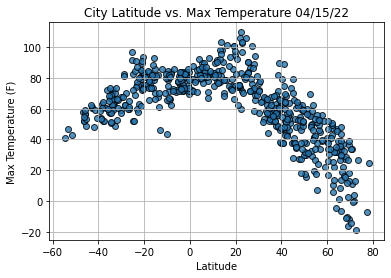

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

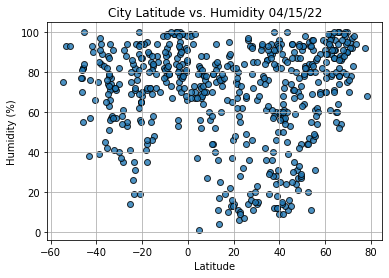

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

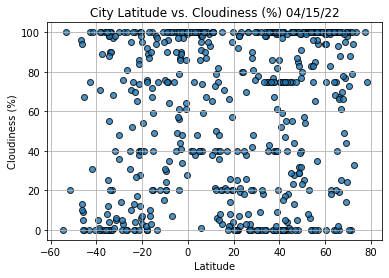

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

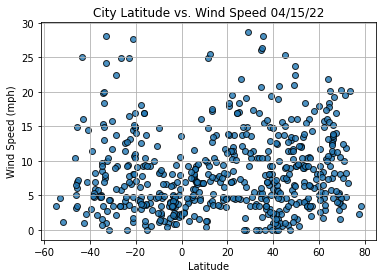

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Create a Linear Regression Function

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

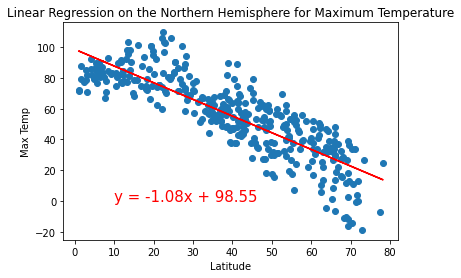

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(10,0))

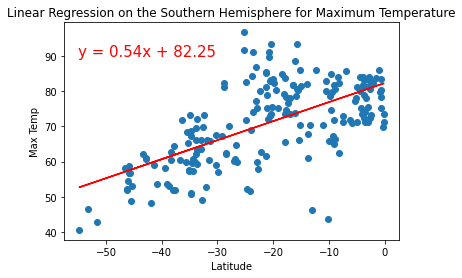

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature',
                       'Max Temp',(-55,90))

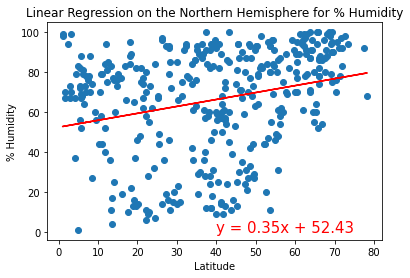

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity',
                       '% Humidity',(40,0))

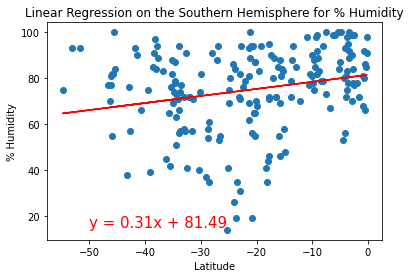

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity',
                       '% Humidity',(-50,15))

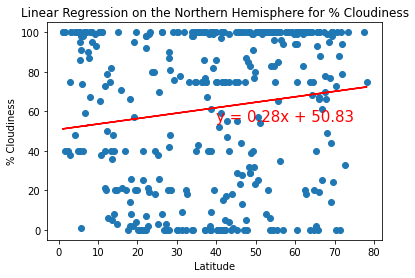

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness',
                       '% Cloudiness',(40,55))

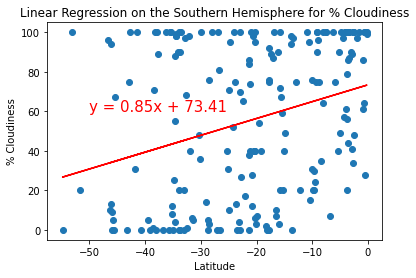

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness',
                       '% Cloudiness',(-50,60))

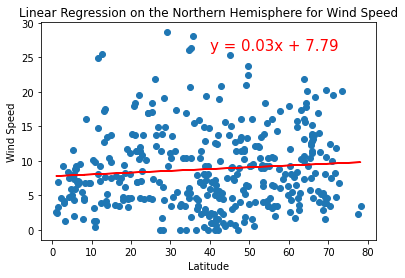

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed',
                       'Wind Speed',(40,26))

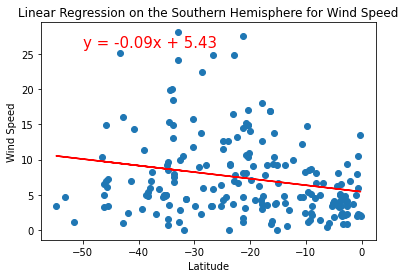

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed',
                       'Wind Speed',(-50,26))